# IBM şirketinde çalışan personelin işten çıkmasını etkileyen faktorler nelerdir?

## 1. Giriş
## 2. Veriye genel bakış
## 3. Veri Temizliği
## 4. Keşifsel Veri Analizi-Özellik Mühendisliği
## 5. Modeller
## 6. Model Performansları




# 1. Giriş:
"IBM HR Analytics Employee Attrition & Performance" veri setini kullanarak IBM şirketinin işten çıkmayı etkileyen faktorleri nelerdir? sorusuna cevap bulmaya çalışacağız? Veri setimizdeki Hedef özelliğimi olarak yani Target olarak 'Attrition' özelliğini seçtim.

In [1]:
import plotly 
plotly.tools.set_credentials_file(username='mehtapc', api_key='235ZAxumoJILdvQGhnP7')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as norm
import seaborn as sns
import scipy.stats as stats
import plotly.plotly as py
import plotly.graph_objs as go
import math
from plotly.tools import FigureFactory as FF
from scipy.stats.mstats import winsorize
from plotly import tools
import warnings
warnings.filterwarnings('ignore')
employee = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
employee_attrition = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 1.2  Veriye genel bakış
Özellikler ve açıklamaları aşağıdadır:
    
* AGE:                           Numerical Value
* ATTRITION:                       Employee leaving the company (0=no, 1=yes)
* BUSINESS TRAVEL:                (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)
* DAILY RATE:                      Numerical Value - Salary Level
* DEPARTMENT:                      (1=HR, 2=R&D, 3=Sales)
* DISTANCE FROM HOME:              Numerical Value - THE DISTANCE FROM WORK TO HOME
* EDUCATION:                       Numerical Value
* EDUCATION FIELD:                 (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)
* ENVIROMENT SATISFACTION:         Numerical Value - SATISFACTION WITH THE ENVIROMENT
* GENDER:                          (1=FEMALE, 2=MALE)
* HOURLY RATE:                     Numerical Value - HOURLY SALARY
* JOB INVOLVEMENT:                 Numerical Value - JOB INVOLVEMENT
* JOB LEVEL:                       Numerical Value - LEVEL OF JOB
* JOB ROLE:                        (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)
* JOB SATISFACTION:                Numerical Value - SATISFACTION WITH THE JOB
* MARITAL STATUS:                  (1=DIVORCED, 2=MARRIED, 3=SINGLE)
* MONTHLY INCOME:                  Numerical Value - MONTHLY SALARY
* MONTHY RATE:                     Numerical Value - MONTHY RATE
* NUMCOMPANIES WORKED:             Numerical Value - NO. OF COMPANIES WORKED AT
* OVERTIME:                        (1=NO, 2=YES)
* PERCENT SALARY HIKE:             Numerical Value - PERCENTAGE INCREASE IN SALARY
* PERFORMANCE RATING:              Numerical Value - ERFORMANCE RATING
* RELATIONS SATISFACTION:          Numerical Value - RELATIONS SATISFACTION
* STOCK OPTIONS LEVEL:             Numerical Value - STOCK OPTIONS
* TOTAL WORKING YEARS:             Numerical Value - TOTAL YEARS WORKED
* TRAINING TIMES LAST YEAR:        Numerical Value - HOURS SPENT TRAINING
* WORK LIFE BALANCE:               Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE
* YEARS AT COMPANY:                Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY
* YEARS IN CURRENT ROLE:           Numerical Value -YEARS IN CURRENT ROLE
* YEARS SINCE LAST PROMOTION:      Numerical Value - LAST PROMOTION
* YEARS WITH CURRENT MANAGER:      Numerical Value - YEARS SPENT WITH CURRENT MANAGER


In [2]:
#Attrition Histogramını çizdirdiğimizde dengesiz (imbalance) oran olduğunu görüyoruz.

data = [go.Bar(
            x=employee["Attrition"].value_counts().index.values,
            y= employee["Attrition"].value_counts().values
    )]

layout = go.Layout(
    title='Attrition Özelliğinin Genel Dağılımı Grafiği',
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-attrition-bar')


* Veri Seti yapısı:  1470 satır, 35 özellik
* Veri tipi: int64 ve object
* Dengesiz(Imbalanced dataset): 1233 (84%) 'no' attrition ve 237 (16%) 'yes' attrition

# 2. Veri Temizliği


Öncelikle veri setimizdeki genel durumuna bakıyoruz ve de unique değerleri üzerinden etkisiz özellikler var mı ona bakıyoruz

In [3]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
employee.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Özelliklerden 'EmployeeNumber', 'EmployeeCount', 'Over18' ve 'StandardHours' etkisiz eleman oldukları için verisetimizden çıkarıyoruz.

In [5]:
employee.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

## 2.1 Veri Türü Tespiti

Kategorik veri tipi olarak object olan veya int olup kategorik olanları kategorik olarak gruplandırdım.
(Attrition özelliği bizim hedef değişkenimiz olduğu için onu da data setten çıkarıyorum.)

Kategorik Veriler
* 'BusinessTravel'
* 'Department'
* 'Education'
* 'EducationField'
* 'EnvironmentSatisfaction'
* 'Gender'
* 'JobInvolvement'
* 'JobLevel'
* 'JobRole'
* 'JobSatisfaction'
* 'MaritalStatus'
* 'NumCompaniesWorked'
* 'OverTime'
* 'PerformanceRating'
* 'RelationshipSatisfaction'
* 'StockOptionLevel'
* 'TrainingTimesLastYear'
* 'WorkLifeBalance'



In [6]:
kategorik_employee=employee.drop(['Attrition','Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'],axis=1)


Sürekli veriler:
* 'Age'
* 'DailyRate'
* 'DistanceFromHome'
* 'HourlyRate'
* 'MonthlyIncome'
* 'MonthlyRate'
* 'TotalWorkingYears'
* 'YearsAtCompany'
* YearsInCurrentRole
* 'YearsSinceLastPromotion'
* 'YearsWithCurrManager'
* 'PercentSalaryHike'

In [7]:
surekli_employee=employee.drop(['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance'],axis=1)

## 2.2 Eksik Veri Araştırması

Info ve null değerlerimize incelediğimizde Sürekli ve Kategorik veri tiplerinin ikisinde de eksik veri olmadığını görüyoruz.

In [8]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

In [9]:
employee.isnull().sum()*100/employee.shape[0]

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
YearsWithCurrManager        0.0
dtype: f

## 2.3 Aşırı Veri Değerlendirmesi

In [10]:
def datauret(attribute,employee):
    y0 = employee[attribute]
    trace0 = go.Box(
        y=y0,
        name = attribute,
        )
    return trace0

In [11]:
data_surekli=list()
rate=surekli_employee
for i in range(len(rate.columns)):
    data_surekli.append(datauret(rate.columns[i],employee))
    #data_surekli2.append(datauret2(rate.columns[i],employee))

In [12]:
def visibleTF(number):
    liste=list()
    for i in range(len(data_surekli)):
        liste.append(False)
    liste[number]=True
    return liste

In [13]:
def button(attribute,number):
    return dict(label = attribute,method = 'update',args = [{'visible': visibleTF(number)},{'title': 'Attrition ilişkisi'}])

In [14]:
layout = go.Layout(
    #barmode='box',
    width=800,
    height=500,
    autosize=False,
    #margin=dict(t=0, b=0, l=0, r=0),
    title='Attrition-Sürekli Özellik Box Grafiği',
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            #text='x Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            #text='y Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
rate=surekli_employee
updatemenus = list([dict(active=-1,buttons=[button(rate.columns[i],i) for i in range(len(rate.columns))])])

In [15]:
layout['updatemenus']=updatemenus
fig = dict(data=data_surekli, layout=layout)
py.iplot(fig, filename='a')

Aykırı değerleri düzenlemek için log ve winsorize işlemlerini uyguladım.

In [16]:
def datauret(attribute,employee):
    
    y0 = employee[attribute]
    y1 = np.log(employee[attribute])
    y2 = winsorize(employee[attribute], (0, 0.05))
    log=attribute+'_log'
    wins=attribute+'_wins'
    employee[log]=np.log(employee[attribute])
    employee[wins]=winsorize(employee[attribute], (0, 0.05))
    
    trace = go.Box(
        y=y0,
        name = attribute,
        marker = dict(
            color = 'rgb(214, 12, 140)',
        )
    )
    trace1 = go.Box(
        y=y1,
        name = attribute+'_log',
        marker = dict(
            color = 'rgb(0, 128, 128)',
        )
    )
    trace2 = go.Box(
        y=y2,
        name = attribute+'_winsorize',
        boxpoints = False,
        marker = dict(
            color = 'rgb(214, 12, 0)',
        )
    )

    data = [trace, trace1, trace2]
    return data

In [17]:
data_surekli=list()
rate=surekli_employee[['MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
for i in range(len(rate.columns)):
    for j in range(3):
        data_surekli.append(datauret(rate.columns[i],employee)[j])
        

In [18]:
fig = tools.make_subplots(rows=6, cols=3)

for i in range(6*3):
    if(i<3):
        fig.append_trace(data_surekli[i], 1, i+1)
    elif(i<6):
        fig.append_trace(data_surekli[i], 2, i-2)
    elif(i<9):
        fig.append_trace(data_surekli[i], 3, i-5)
    elif(i<12):
        fig.append_trace(data_surekli[i], 4, i-8)
    elif(i<15):
        fig.append_trace(data_surekli[i], 5, i-11)
    else:
        fig.append_trace(data_surekli[i], 6, i-14)
    
fig['layout'].update(height=800, width=1000, title='Aşırı değerler için log-winsorize grafikleri')
py.iplot(fig, filename='simple-subplot-with-annotations')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]  
[ (2,1) x4,y4 ]    [ (2,2) x5,y5 ]    [ (2,3) x6,y6 ]  
[ (3,1) x7,y7 ]    [ (3,2) x8,y8 ]    [ (3,3) x9,y9 ]  
[ (4,1) x10,y10 ]  [ (4,2) x11,y11 ]  [ (4,3) x12,y12 ]
[ (5,1) x13,y13 ]  [ (5,2) x14,y14 ]  [ (5,3) x15,y15 ]
[ (6,1) x16,y16 ]  [ (6,2) x17,y17 ]  [ (6,3) x18,y18 ]



Logaritma uygulanan bazı değerlerde -inf olduğu için onları median ve meanden uygun olana eşitleyerek, eksik verilerini doldurdum
    

In [19]:
median_TotalWorkingYears=employee[employee["TotalWorkingYears_log"]!=-math.inf]["TotalWorkingYears_log"].median()
TotalWorkingYears_inf=employee[employee["TotalWorkingYears_log"]==-math.inf]["TotalWorkingYears_log"]
for i in range(len(TotalWorkingYears_inf.index)):
    employee.loc[TotalWorkingYears_inf.index[i],"TotalWorkingYears_log"]=median_TotalWorkingYears

In [20]:
median_YearsAtCompany=employee[employee["YearsAtCompany_log"]!=-math.inf]["YearsAtCompany_log"].median()
YearsAtCompany_inf=employee[employee["YearsAtCompany_log"]==-math.inf]["YearsAtCompany_log"]
for i in range(len(YearsAtCompany_inf.index)):
    employee.loc[YearsAtCompany_inf.index[i],"YearsAtCompany_log"]=median_YearsAtCompany

In [21]:
median_YearsInCurrentRole=employee[employee["YearsInCurrentRole_log"]!=-math.inf]["YearsInCurrentRole_log"].median()
YearsInCurrentRole_inf=employee[employee["YearsInCurrentRole_log"]==-math.inf]["YearsInCurrentRole_log"]
for i in range(len(YearsInCurrentRole_inf.index)):
    employee.loc[YearsInCurrentRole_inf.index[i],"YearsInCurrentRole_log"]=median_YearsInCurrentRole

In [22]:
median_YearsSinceLastPromotion=employee[employee["YearsSinceLastPromotion_log"]!=-math.inf]["YearsSinceLastPromotion_log"].median()
YearsSinceLastPromotion_inf=employee[employee["YearsSinceLastPromotion_log"]==-math.inf]["YearsSinceLastPromotion_log"]
for i in range(len(YearsSinceLastPromotion_inf.index)):
    employee.loc[YearsSinceLastPromotion_inf.index[i],"YearsSinceLastPromotion_log"]=median_YearsSinceLastPromotion

In [23]:
median_YearsWithCurrManager=employee[employee["YearsWithCurrManager_log"]!=-math.inf]["YearsWithCurrManager_log"].median()
YearsWithCurrManager_inf=employee[employee["YearsWithCurrManager_log"]==-math.inf]["YearsWithCurrManager_log"]
for i in range(len(YearsWithCurrManager_inf.index)):
    employee.loc[YearsWithCurrManager_inf.index[i],"YearsWithCurrManager_log"]=median_YearsWithCurrManager

In [24]:
surekli_employee=employee.drop(['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance'],axis=1)

In [25]:
surekli_employee=surekli_employee.drop(['MonthlyIncome_wins','MonthlyIncome','TotalWorkingYears_wins','TotalWorkingYears','YearsAtCompany_wins','YearsAtCompany','YearsInCurrentRole','YearsInCurrentRole_wins','YearsSinceLastPromotion','YearsSinceLastPromotion_wins','YearsWithCurrManager','YearsWithCurrManager_wins'],axis=1)

Aşırı değerleri düzenledikten sonra sürekli özelliklerimizin listesi aşağıdaki şekildedir.;

In [26]:
surekli_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
Age                            1470 non-null int64
DailyRate                      1470 non-null int64
DistanceFromHome               1470 non-null int64
HourlyRate                     1470 non-null int64
MonthlyRate                    1470 non-null int64
PercentSalaryHike              1470 non-null int64
MonthlyIncome_log              1470 non-null float64
TotalWorkingYears_log          1470 non-null float64
YearsAtCompany_log             1470 non-null float64
YearsInCurrentRole_log         1470 non-null float64
YearsSinceLastPromotion_log    1470 non-null float64
YearsWithCurrManager_log       1470 non-null float64
dtypes: float64(6), int64(6)
memory usage: 137.9 KB


In [27]:
surekli_employee.corr()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,PercentSalaryHike,MonthlyIncome_log,TotalWorkingYears_log,YearsAtCompany_log,YearsInCurrentRole_log,YearsSinceLastPromotion_log,YearsWithCurrManager_log
Age,1.000000,0.010661,-0.001686,0.024287,0.028051,0.003634,0.494310,0.611616,0.231438,0.179766,0.179211,0.176081
DailyRate,0.010661,1.000000,-0.004985,0.023381,-0.032182,0.022704,0.012503,0.013387,-0.012674,-0.009439,-0.018053,-0.039872
DistanceFromHome,-0.001686,-0.004985,1.000000,0.031131,0.027473,0.040235,0.005683,0.016699,0.011001,0.014248,-0.000379,0.006461
HourlyRate,0.024287,0.023381,0.031131,1.000000,-0.015297,-0.009062,-0.017349,-0.009133,-0.021240,-0.033121,-0.020716,0.012356
MonthlyRate,0.028051,-0.032182,0.027473,-0.015297,1.000000,-0.006429,0.044495,0.005070,-0.035002,-0.010808,0.002496,-0.037586
PercentSalaryHike,0.003634,0.022704,0.040235,-0.009062,-0.006429,1.000000,-0.027516,-0.029886,-0.041508,0.011301,0.001506,0.034756
MonthlyIncome_log,0.494310,0.012503,0.005683,-0.017349,0.044495,-0.027516,1.000000,0.696870,0.450581,0.342093,0.281570,0.294585
TotalWorkingYears_log,0.611616,0.013387,0.016699,-0.009133,0.005070,-0.029886,0.696870,1.000000,0.615157,0.406789,0.305849,0.377817
YearsAtCompany_log,0.231438,-0.012674,0.011001,-0.021240,-0.035002,-0.041508,0.450581,0.615157,1.000000,0.612921,0.425238,0.581681
YearsInCurrentRole_log,0.179766,-0.009439,0.014248,-0.033121,-0.010808,0.011301,0.342093,0.406789,0.612921,1.000000,0.437535,0.625934


Correlation Matrix te de goruldugu üzere 2li ilişkilere bakarsak
* TotalWorkingYears_log   ---   Age                    ---0.61
* TotalWorkingYears_log   ---   MonthlyIncome_log      ---0.70
* TotalWorkingYears_log   ---   YearsAtCompany_log     ---0.61
* YearsInCurrentRole_log  ---   YearsAtCompany_log     ---0.61
* YearsWithCurrManager_log---   YearsInCurrentRole_log ---0.62


# 3 Keşifsel Veri Analizi-Özellik Mühendisliği

## 3.1 Sürekli değişkenler-Attrition İlişkisi

Sürekli değişkenler için Attrition ilişkilerine baktım ve Ttestle anlamlı farkındalık olup olmadığını kontrol ettim

In [28]:
def datauret(a,surekli_employee):
    x = ["Yes", "No"]
    y = [surekli_employee[employee['Attrition']=='Yes'][a].mean(),surekli_employee[employee['Attrition']=='No'][a].mean()]
    
    trace = go.Bar(
        name=a,
        x=x,
        y=y,
    )
    
    return trace

In [29]:
data_surekli=list()
rate=surekli_employee
for i in range(len(rate.columns)):
    data_surekli.append(datauret(rate.columns[i],surekli_employee))


In [30]:
def visibleTF_s(number):
    liste=list()
    for i in range(len(data_surekli)):
        liste.append(False)
    liste[number]=True
    return liste

In [31]:
def button(attribute,number):
    return dict(label = attribute,method = 'update',args = [{'visible': visibleTF_s(number)},{'title': 'Sürekli-Attribute ilişkisi'}])

In [32]:
layout = go.Layout(
    barmode='stack',
    width=700,
    height=500,
    autosize=False,
    title='Sürekli-Attribute ilişkisi',
        
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            #text='x Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f6f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            #text='y Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
rate=surekli_employee
updatemenus = list([dict(active=-1,buttons=[button(rate.columns[i],i) for i in range(len(rate.columns))])])

In [33]:
layout['updatemenus']=updatemenus
fig = dict(data=data_surekli, layout=layout)
py.iplot(fig, filename='Sürekli-Attribute ilişkisi')

T test için 

In [34]:
attrition = employee["Attrition"].unique()
pd.options.display.float_format = '{:.15f}'.format
for var in ["PercentSalaryHike","DistanceFromHome","YearsInCurrentRole_log","YearsSinceLastPromotion_log","YearsWithCurrManager_log","MonthlyIncome_log", "TotalWorkingYears_log",'YearsAtCompany_log','Age','DailyRate','HourlyRate','MonthlyRate']:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(attrition)):
        for j in range(i+1, len(attrition)):
            ttest = stats.ttest_ind(employee[employee["Attrition"]==attrition[i]][var], 
                                employee[employee["Attrition"]==attrition[j]][var])
            grup_1 = attrition[i]
            grup_2 = attrition[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

PercentSalaryHike için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Yes,No,-0.516457325074764,0.605612823889376


DistanceFromHome için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Yes,No,2.994708098265125,0.002793060080213


YearsInCurrentRole_log için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Yes,No,-3.563178395003217,0.000378115569559


YearsSinceLastPromotion_log için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Yes,No,-0.293133614862030,0.769461454453264


YearsWithCurrManager_log için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Yes,No,-1.741552615111132,0.081796225211709


MonthlyIncome_log için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Yes,No,-7.748053631123342,0.000000000000017


TotalWorkingYears_log için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Yes,No,-9.007604542365765,0.000000000000000


YearsAtCompany_log için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Yes,No,-7.181158202104013,0.000000000001095


Age için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Yes,No,-6.178663835307217,0.000000000835631


DailyRate için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Yes,No,-2.174083677701775,0.029858160660265


HourlyRate için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Yes,No,-0.262289873492645,0.793134768994424


MonthlyRate için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,Yes,No,0.581305821154532,0.561123598224301


Tteste göre p>0.05 olan özelliklerin anlamlı farklılık olmadığını biliyoruz.
YearsSinceLastPromotion, YearsWithCurrManager,PercentSalaryHike , MonthlyRate ve HourlyRate özelliklerinin ,p degerlerinin 0.05 ten yuksek olmasından dolayı, anlamlı farklılık olmadığını görüyoruz. 



## 3.2 Kategorik değişkenler-Attrition İlişkisi

Kategorik değişkenler için Attrition ilişkilerine baktım ve chisquare testiyle anlamlı farkındalık olup olmadığını kontrol ettim

In [35]:
def percent_attritionbarplot2(x,employee):
    liste=employee.sort_values(by=x)[x].unique().tolist()
    #liste=employee[x].unique().tolist()
    listepercentyes=[]
    listepercentno=[]
    genele_etki=[]
    for i in range(len(liste)):
        a=(len(employee[employee[x]==liste[i]][employee['Attrition']=='Yes'])/len(employee[employee[x]==liste[i]]))*100
        b=100-a
        listepercentyes.append(a)
        listepercentno.append(b)
        geneleoran=len(employee[employee[x]==liste[i]])/len(employee)
        genele_etki.append(geneleoran*a)

    trace1 = go.Bar(
        x=liste,
        y=listepercentyes,
        name='Yes',
        
    )
    trace2 = go.Bar(
        x=liste,
        y=listepercentno,
        name='No',
    )

    data = [trace1, trace2]
    return data

In [36]:

data_kategorik=list()
rate=kategorik_employee
for i in range(len(rate.columns)):
    for j in range(2):
        data_kategorik.append(percent_attritionbarplot2(rate.columns[i],employee)[j])

In [37]:
def visibleTF(number):
    liste=list()
    for i in range(len(data_kategorik)):
        liste.append(False)
    liste[2*number-2]=True
    liste[2*number-1]=True
    return liste

In [38]:
def button(attribute,number):
    return dict(label = attribute,method = 'update',args = [{'visible': visibleTF(number)},{'title': 'Kategorik-Attrition yüzde ilişkisi'}])

In [39]:
layout = go.Layout(
     barmode='stack',
    width=700,
    height=500,
    autosize=False,
    title='Kategorik-Attribute ilişkisi',
        
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            #text='x Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f6f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            #text='y Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

rate=kategorik_employee
updatemenus = list([dict(active=-1,buttons=[button(rate.columns[i],i+1) for i in range(len(rate.columns))])])

In [40]:
layout['updatemenus']=updatemenus
fig = dict(data=data_kategorik, layout=layout)
py.iplot(fig, filename='Kategorik-Attribute yuzdesi')

In [41]:
rate=kategorik_employee
for i in range(len(rate.columns)):
    employ_tablosu=pd.crosstab(employee["Attrition"],employee[rate.columns[i]])
    print(stats.chisquare(employ_tablosu, axis=None))

Power_divergenceResult(statistic=2114.9714285714285, pvalue=0.0)
Power_divergenceResult(statistic=1957.7469387755102, pvalue=0.0)
Power_divergenceResult(statistic=1477.142857142857, pvalue=0.0)
Power_divergenceResult(statistic=2392.987755102041, pvalue=0.0)
Power_divergenceResult(statistic=820.2530612244899, pvalue=7.900930552947623e-173)
Power_divergenceResult(statistic=752.8408163265306, pvalue=7.304007796791317e-163)
Power_divergenceResult(statistic=2264.802721088435, pvalue=0.0)
Power_divergenceResult(statistic=1696.2857142857144, pvalue=0.0)
Power_divergenceResult(statistic=1403.1673469387754, pvalue=3.229571482791907e-288)
Power_divergenceResult(statistic=820.0680272108843, pvalue=8.661907034984411e-173)
Power_divergenceResult(statistic=890.8244897959185, pvalue=2.5756605932932327e-190)
Power_divergenceResult(statistic=2409.9455782312925, pvalue=0.0)
Power_divergenceResult(statistic=1258.9414965986393, pvalue=1.1929298006311467e-272)
Power_divergenceResult(statistic=1705.58095238

Bütün p değerleri 0.05 in altında, yani yukarıda gördüğümüz grafikteki kategorik - attrition ilişkilerindeki farklılıkları anlamlı olarak değerlendirilebilir.

Grafikleri incelediğimizde 
* BusinessTravel:Alt başlıkları olan Non-Travel, Travel_Frequently ve Travel_Rarely oranları birbirinden farklı olduğu için işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* Department:Human Resources ve Sales oranları birbirine oldukça yakındır, bunun yanında Research&Development ayrılma oranı bu iki değerden farklıdır. Genel olarak bir fark gözüktüğü için işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* Education:1 den 5 e kadar olan eğitim seviyelerinde işten ayrılma oranı farkları %10 ile 18 arasında değişiklik göstermektedir.İşten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* EducationField:Life Science, Medical ve Other neredeyse aynı işten ayrılma yüzdelerine sahiptirler. Bunun yanında HR ve Technical Degree oranları da neredeyse aynıdır. Marketing diğerlerinden farklı orandadır. Grupsal olarak ta olsa educationfield özelliği işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* EnvironmentSatisfaction:1. seviye ile neredeyse aynı olan 2., 3. ve 4. seviyeler arasında fark vardır.Grupsal olarak ta olsa EnvironmentSatisfaction özelliği işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* Gender:Female ve Male arasında %2,8 fark vardır. Yeterli bir fark mıdır emin olamadım.yüzdelik oranda farklı görmediğim için özelliklerden biri diyemem.
* JobInvolvement:Bu özelliğin bütün seviyeleri için yeterli farklılıklar vardır. O yuzden işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* JobLevel:1. seviyenin işten ayrılma oranı farklı yüksek olmasıyla beraber her seviyenin birbirinden farklı yüzdede etkilediğini söyleyebiliriz.işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* JobRole:Bazı roller oran olarak birbirine yakın gözükmesiyle beraber genel olarak işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* JobSatisfaction:2. ve 3. seviyelerin oranları birbirine çok yakın olmakta birlikte 1. ve 4. seviyeler birbirlerinden farklıdır.işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* MaritalStatus:Özellikle Single daki büyük işten ayrılma oranı ile birlikte oranların hepsi birbirinden farklı diyebiliriz. Böylelikle işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* NumCompaniesWorked:Bazı değerlerde kısmı aynılıklar olsa da Genel olarak bir fark gözüktüğü için işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* OverTime:Bu özellikte fark oldukça belirgindir. İşten ayrılmayı(attrition) etkileyen özelliklerden biridir
* PerformanceRating:Performance Rating te bir fark olmadıgını goruyoruz. O yüzden Perfomance Rating işten ayrılmayı(attrition) etkileyen özelliklerde değil
* RelationshipSatisfaction:1. değerin oranı oldukça farklı olmasına rağmen diğer 3 değer neredeyse aynı oranlardadır. Kısmı de olsa bu farkla işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz 
* StockOptionLevel:1 ve 2 nin oranları oldukca aynı olsada 0 ve 4. ile oranlarının farkları ile birlikte işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* TrainingTimesLastYear:Bazı değerlerde kısmı aynılıklar olsa da Genel olarak bir fark gözüktüğü için işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz
* WorkLifeBalance:2. ,3. ve 4. değerlerin oranları birbirine yakın olsa da 1. değer farklıdır. Kısmı de olsa bu farkla işten ayrılmayı(attrition) etkileyen özelliklerden biridir diyebiliriz 

## 5. Sonuç olarak 
IBM şirketinin işten çıkmayı etkileyen faktorleri nelerdir? sorusuna cevap aradık? 1470 satır , 35 özellikten oluşan bir veri tipine sahiptik.Veri setimizdeki hedef olarak yani Target olarak 'Attrition' özelliğini seçtim. Öncelikle hedef özelliğimiz olan attrition'ın verisetindeki 1233 (84%) 'no' attrition ve 237 (16%) 'yes' attrition oranları ile verisetimizin dengesiz(imbalanced) yapıda olduğunu gördük. Yaptığımız analizler sonucu özellikleri incelediğimizde 'Attrition' hedef özelliği altında 12 tane attritionı etkilemeyen özellik, 22 tane de etkileyen özelliği tespit ettik.

* Hedef Özellik:Attrition
* Hedefe etki etmeyenler özellikler:Gender, PerformanceRating, DailyRate, HourlyRate, MonthlyRate, PercentSalaryHike, YearsSinceLastPromotion, YearsWithCurrManager, EmployeeNumber, EmployeeCount, Over18, StandardHours, 
* Hedefe etki edenler özellikler:Age, BusinessTravel, Department, DistanceFromHome, Education, EducationField , EnvironmentSatisfaction, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, NumCompaniesWorked, OverTime, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears,TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole    


In [42]:
employee_sade2=employee[['Attrition','Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education' , 'EducationField' , 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole']]

In [43]:
employee_sade2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
Attrition                   1470 non-null object
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null object
RelationshipSatisfaction    1470 non-null int64
StockOptionLevel            1470 non-null int64
TotalWorkingYears     

In [44]:
employee_sade2['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [45]:
#'Non-Travel'---------------------------0
#'Travel_Rarely'------------------------1
#'Travel_Frequently'--------------------2


for i in range(len(employee_sade2)):
    if(employee_sade2['BusinessTravel'].iloc[i]=='Non-Travel'):
        employee_sade2['BusinessTravel'].iloc[i]=0
    elif(employee_sade2['BusinessTravel'].iloc[i]=='Travel_Rarely'):
        employee_sade2['BusinessTravel'].iloc[i]=1
    elif(employee_sade2['BusinessTravel'].iloc[i]=='Travel_Frequently'):
        employee_sade2['BusinessTravel'].iloc[i]=2  


In [46]:
employee_sade2['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [47]:
#'Sales'------------------------------0
#'Research & Development'-------------1
#'Human Resources'--------------------2

for i in range(len(employee_sade2)):
    if(employee_sade2['Department'].iloc[i]=='Sales'):
        employee_sade2['Department'].iloc[i]=0
    elif(employee_sade2['Department'].iloc[i]=='Research & Development'):
        employee_sade2['Department'].iloc[i]=1
    elif(employee_sade2['Department'].iloc[i]=='Human Resources'):
        employee_sade2['Department'].iloc[i]=2  


In [48]:
employee_sade2['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [49]:
#'Life Sciences'---------------0
#'Medical'---------------------1
#'Marketing'-------------------2
#'Technical Degree' -----------3
#'Human Resources'-------------4
#'Other'-----------------------5

for i in range(len(employee_sade2)):
    if(employee_sade2['EducationField'].iloc[i]=='Life Sciences'):
        employee_sade2['EducationField'].iloc[i]=0
    elif(employee_sade2['EducationField'].iloc[i]=='Medical'):
        employee_sade2['EducationField'].iloc[i]=1
    elif(employee_sade2['EducationField'].iloc[i]=='Marketing'):
        employee_sade2['EducationField'].iloc[i]=2 
    elif(employee_sade2['EducationField'].iloc[i]=='Technical Degree'):
        employee_sade2['EducationField'].iloc[i]=3
    elif(employee_sade2['EducationField'].iloc[i]=='Human Resources'):
        employee_sade2['EducationField'].iloc[i]=4
    elif(employee_sade2['EducationField'].iloc[i]=='Other'):
        employee_sade2['EducationField'].iloc[i]=5

In [50]:
employee_sade2['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [51]:
#'Sales Executive'----------------------0
#'Research Scientist'-------------------1
#'Laboratory Technician'----------------2
#'Manufacturing Director'---------------3
#'Healthcare Representative'------------4 
#'Manager'------------------------------5
#'Sales Representative'-----------------6
#'Research Director'--------------------7
#'Human Resources'----------------------8

for i in range(len(employee_sade2)):
    if(employee_sade2['JobRole'].iloc[i]=='Sales Executive'):
        employee_sade2['JobRole'].iloc[i]=0
    elif(employee_sade2['JobRole'].iloc[i]=='Research Scientist'):
        employee_sade2['JobRole'].iloc[i]=1
    elif(employee_sade2['JobRole'].iloc[i]=='Laboratory Technician'):
        employee_sade2['JobRole'].iloc[i]=2 
    elif(employee_sade2['JobRole'].iloc[i]=='Manufacturing Director'):
        employee_sade2['JobRole'].iloc[i]=3
    elif(employee_sade2['JobRole'].iloc[i]=='Healthcare Representative'):
        employee_sade2['JobRole'].iloc[i]=4
    elif(employee_sade2['JobRole'].iloc[i]=='Manager'):
        employee_sade2['JobRole'].iloc[i]=5
    elif(employee_sade2['JobRole'].iloc[i]=='Sales Representative'):
        employee_sade2['JobRole'].iloc[i]=6
    elif(employee_sade2['JobRole'].iloc[i]=='Research Director'):
        employee_sade2['JobRole'].iloc[i]=7
    elif(employee_sade2['JobRole'].iloc[i]=='Human Resources'):
        employee_sade2['JobRole'].iloc[i]=8

In [52]:
employee_sade2['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [53]:
#'Single'------------------------------0
#'Married'-----------------------------1
#'Divorced'----------------------------2

for i in range(len(employee_sade2)):
    if(employee_sade2['MaritalStatus'].iloc[i]=='Single'):
        employee_sade2['MaritalStatus'].iloc[i]=0
    elif(employee_sade2['MaritalStatus'].iloc[i]=='Married'):
        employee_sade2['MaritalStatus'].iloc[i]=1
    elif(employee_sade2['MaritalStatus'].iloc[i]=='Divorced'):
        employee_sade2['MaritalStatus'].iloc[i]=2 

In [54]:
employee_sade2['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [55]:
#'No'------------------------------0
#'Yes'-----------------------------1

for i in range(len(employee_sade2)):
    if(employee_sade2['OverTime'].iloc[i]=='No'):
        employee_sade2['OverTime'].iloc[i]=0
    elif(employee_sade2['OverTime'].iloc[i]=='Yes'):
        employee_sade2['OverTime'].iloc[i]=1

In [56]:
employee_sade2['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [57]:
for i in range(len(employee_sade2)):
    if(employee_sade2['Attrition'].iloc[i]=='No'):
        employee_sade2['Attrition'].iloc[i]=0
    elif(employee_sade2['Attrition'].iloc[i]=='Yes'):
        employee_sade2['Attrition'].iloc[i]=1

In [58]:
employee_sade2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
Attrition                   1470 non-null int64
Age                         1470 non-null int64
BusinessTravel              1470 non-null int64
Department                  1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int64
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StockOptionLevel            1470 non-null int64
TotalWorkingYears           1

In [59]:
# 10 özelliğe indirgenmiş verisetinin düzenlenmesi
# * BusinessTravel, 
# * JobInvolvement, 
# * JobLevel, 
# * JobSatisfaction,
# * MaritalStatus, 
# * MonthlyIncome,  
# * OverTime, 
# * StockOptionLevel, 
# * WorkLifeBalance, 
# * YearsAtCompany, 


In [60]:
employee_sade=employee[['Attrition', 'BusinessTravel', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'WorkLifeBalance', 'YearsAtCompany']]

In [61]:
employee_sade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
Attrition          1470 non-null object
BusinessTravel     1470 non-null object
JobInvolvement     1470 non-null int64
JobLevel           1470 non-null int64
JobSatisfaction    1470 non-null int64
MaritalStatus      1470 non-null object
MonthlyIncome      1470 non-null int64
OverTime           1470 non-null object
WorkLifeBalance    1470 non-null int64
YearsAtCompany     1470 non-null int64
dtypes: int64(6), object(4)
memory usage: 114.9+ KB


In [62]:
employee_sade['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [63]:
#'Non-Travel'---------------------------0
#'Travel_Rarely'------------------------1
#'Travel_Frequently'--------------------2


In [64]:
for i in range(len(employee_sade)):
    if(employee_sade['BusinessTravel'].iloc[i]=='Non-Travel'):
        employee_sade['BusinessTravel'].iloc[i]=0
    elif(employee_sade['BusinessTravel'].iloc[i]=='Travel_Rarely'):
        employee_sade['BusinessTravel'].iloc[i]=1
    elif(employee_sade['BusinessTravel'].iloc[i]=='Travel_Frequently'):
        employee_sade['BusinessTravel'].iloc[i]=2  


In [65]:
employee_sade['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [66]:
#'Single'------------------------------0
#'Married'-----------------------------1
#'Divorced'----------------------------2

In [67]:
for i in range(len(employee_sade)):
    if(employee_sade['MaritalStatus'].iloc[i]=='Single'):
        employee_sade['MaritalStatus'].iloc[i]=0
    elif(employee_sade['MaritalStatus'].iloc[i]=='Married'):
        employee_sade['MaritalStatus'].iloc[i]=1
    elif(employee_sade['MaritalStatus'].iloc[i]=='Divorced'):
        employee_sade['MaritalStatus'].iloc[i]=2 

In [68]:
employee_sade['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [69]:
#'No'------------------------------0
#'Yes'-----------------------------1

In [70]:
for i in range(len(employee_sade)):
    if(employee_sade['OverTime'].iloc[i]=='No'):
        employee_sade['OverTime'].iloc[i]=0
    elif(employee_sade['OverTime'].iloc[i]=='Yes'):
        employee_sade['OverTime'].iloc[i]=1

In [71]:
employee_sade['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [72]:
for i in range(len(employee_sade)):
    if(employee_sade['Attrition'].iloc[i]=='No'):
        employee_sade['Attrition'].iloc[i]=0
    elif(employee_sade['Attrition'].iloc[i]=='Yes'):
        employee_sade['Attrition'].iloc[i]=1

# 5.LOGİSTİK MODELLER (Sınıf dengesizliği ve Hiperparametreye göre)

In [73]:
# Modelleri oluştururken sınıf dengesizliği yöntemleri ile dengelenmiş veri, 
# hiperparametre yöntemleriyle belirlenmiş parametreler ve de RFE yöntemi de kullanılarak gruplanmıştır.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
import plotly.tools as tls
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def employee_attrition_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
    
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #print("Hata Matrisi (Test verileri)", "-"*30, conf_matrix, sep="\n")
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not attrition","attrition"],
                        y = ["Not attrition","attrition"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    
    
    #subplots
    fig = tls.make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic'))
    
  
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)

    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 600,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    
    return py.iplot(fig)
    
    if threshold_plot == True :
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

## 5.1 Logistic Regression(Base) Modeli


In [75]:
X2=employee_sade2.drop('Attrition', axis=1)
y=employee_sade2['Attrition']
cols2    = [i for i in X2.columns]
target_col=['Attrition']

train_X,test_X,train_Y,test_Y = train_test_split(X2,y,test_size = .20 ,random_state = 111)


### 5.1.1 Hiperparametrelerin GridSearchCV ile ayarlaması

In [76]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(X2, y)
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)


En iyi parametreler :  {'C': 10, 'penalty': 'l1'}
En iyi skor         :  0.8843537414965986


In [81]:
logit_GridSearchCV = LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

employee_attrition_prediction(logit_GridSearchCV,train_X,test_X,train_Y,test_Y,
                         cols2,"coefficients",threshold_plot = True)

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       253
           1       0.62      0.37      0.46        41

    accuracy                           0.88       294
   macro avg       0.76      0.67      0.70       294
weighted avg       0.86      0.88      0.87       294

Accuracy   Score :  0.8809523809523809
Area under curve :  0.6651402680034705 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### 5.1.2 Hiperparametrelerin RandomizedSearchCV ile ayarlaması

In [82]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
logreg = LogisticRegression()
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X2, y)

print("En iyi parametreler        : ", rs_cv.best_params_)

En iyi parametreler        :  {'penalty': 'l1', 'C': 100}


In [83]:

logit_RandomizedSearchCV = LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

employee_attrition_prediction(logit_RandomizedSearchCV,train_X,test_X,train_Y,test_Y,
                         cols2,"coefficients",threshold_plot = True)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       253
           1       0.65      0.37      0.47        41

    accuracy                           0.88       294
   macro avg       0.78      0.67      0.70       294
weighted avg       0.87      0.88      0.87       294

Accuracy   Score :  0.8843537414965986
Area under curve :  0.6671165525884506 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## 5.2 Logistic Regression(Örneklem Artırma) Modeli

In [84]:
from sklearn.utils import resample

X=employee_sade.drop('Attrition', axis=1)

cols= [i for i in X.columns]

ise_devam = employee_sade[employee_sade.Attrition == 0]
isten_ayrilan = employee_sade[employee_sade.Attrition == 1]

isten_ayrilan_artırılmış = resample(isten_ayrilan,
                                     replace = True,
                                     n_samples = len(ise_devam),
                                     random_state = 111)

artırılmıs_employee = pd.concat([ise_devam, isten_ayrilan_artırılmış])
artırılmıs_employee['Attrition'].value_counts()

X_up = artırılmıs_employee.drop('Attrition', axis=1)
y_up = artırılmıs_employee['Attrition']

#Split train and test data
up_train_X,up_test_X,up_train_Y,up_test_Y = train_test_split(X_up,y_up,
                                                             test_size = .20 ,
                                                            random_state = 111)

### 5.2.1 Hiperparametrelerin GridSearchCV ile ayarlaması

In [80]:

grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(X_up, y_up)
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

NameError: name 'X_up' is not defined

In [85]:
logit_up_GridSearchCV = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

employee_attrition_prediction(logit_up_GridSearchCV,up_train_X,up_test_X,up_train_Y,up_test_Y,
                              cols,"coefficients",threshold_plot = True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.68      0.73      0.71       252
           1       0.70      0.64      0.67       242

    accuracy                           0.69       494
   macro avg       0.69      0.69      0.69       494
weighted avg       0.69      0.69      0.69       494

Accuracy   Score :  0.6902834008097166
Area under curve :  0.689377541650269 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### 5.2.2 Hiperparametrelerin RandomizedSearchCV ile ayarlaması

In [86]:
logreg = LogisticRegression()
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X_up, y_up)

print("En iyi parametreler        : ", rs_cv.best_params_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 0.0001}


In [87]:

logit_up_RandomizedSearchCV = LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

employee_attrition_prediction(logit_up_RandomizedSearchCV,up_train_X,up_test_X,up_train_Y,up_test_Y,
                              cols,"coefficients",threshold_plot = True)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.56      0.90      0.70       252
           1       0.73      0.27      0.40       242

    accuracy                           0.60       494
   macro avg       0.65      0.59      0.55       494
weighted avg       0.65      0.60      0.55       494

Accuracy   Score :  0.5951417004048583
Area under curve :  0.5887445887445888 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## 5.3 Logistic Regression(RFE(Örneklem Arttırmak) ) Modeli 

In [88]:
# Örneklem Artırma

from sklearn.utils import resample

X=employee_sade2.drop('Attrition', axis=1)

cols= [i for i in X.columns]

ise_devam = employee_sade2[employee_sade2.Attrition == 0]
isten_ayrilan = employee_sade2[employee_sade2.Attrition == 1]

isten_ayrilan_artırılmış = resample(isten_ayrilan,
                                     replace = True,
                                     n_samples = len(ise_devam),
                                     random_state = 111)

artırılmıs_employee = pd.concat([ise_devam, isten_ayrilan_artırılmış])
artırılmıs_employee['Attrition'].value_counts()

X_up = artırılmıs_employee.drop('Attrition', axis=1)
y_up = artırılmıs_employee['Attrition']

In [89]:

from sklearn.feature_selection import RFE
import plotly.figure_factory as ff#visualization

logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(X_up,y_up.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in cols2],
                       "ranking" : rfe.ranking_,
                      })
colss = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

up_X_rfe=X_up[colss]
up_Y_rfe=y_up

###
#Split train and test data
up_rfe_train_X,up_rfe_test_X,up_rfe_train_Y,up_rfe_test_Y = train_test_split(up_X_rfe,up_Y_rfe,
                                                                         test_size = .20 , random_state=111)


### 5.3.1 Hiperparametrelerin GridSearchCV ile ayarlaması

In [90]:
grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(up_X_rfe, up_Y_rfe)
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 10, 'penalty': 'l1'}
En iyi skor         :  0.708029197080292


In [91]:

logit_up_rfe_GridSearchCV = LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

employee_attrition_prediction(logit_up_rfe_GridSearchCV,up_rfe_train_X,up_rfe_test_X,up_rfe_train_Y,up_rfe_test_Y,
                              cols,"coefficients",threshold_plot = True)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.69      0.73      0.71       252
           1       0.70      0.66      0.68       242

    accuracy                           0.70       494
   macro avg       0.70      0.70      0.70       494
weighted avg       0.70      0.70      0.70       494

Accuracy   Score :  0.6963562753036437
Area under curve :  0.6956578774760593 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### 5.3.2 Hiperparametrelerin RandomizedSearchCV ile ayarlaması

In [92]:
logreg = LogisticRegression()
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(up_X_rfe, up_Y_rfe)

print("En iyi parametreler        : ", rs_cv.best_params_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 0.0001}


In [93]:

logit_up_rfe_RandomizedSearchCV = LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

employee_attrition_prediction(logit_up_rfe_RandomizedSearchCV,up_rfe_train_X,up_rfe_test_X,up_rfe_train_Y,up_rfe_test_Y,
                              cols,"coefficients",threshold_plot = True)


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.53      0.98      0.69       252
           1       0.86      0.10      0.18       242

    accuracy                           0.55       494
   macro avg       0.70      0.54      0.44       494
weighted avg       0.69      0.55      0.44       494

Accuracy   Score :  0.5526315789473685
Area under curve :  0.5437163846254756 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## 5.4 Logistic Regression(Örneklem azaltmak) Modeli 

In [94]:

ise_devam = employee_sade[employee_sade.Attrition == 0]
isten_ayrilan = employee_sade[employee_sade.Attrition == 1]

ise_devam_azaltılmış = resample(ise_devam,
                                     replace = True,
                                     n_samples = len(isten_ayrilan),
                                     random_state = 111)

azaltılmış_employee = pd.concat([isten_ayrilan, ise_devam_azaltılmış])
azaltılmış_employee['Attrition'].value_counts()


X_down = azaltılmış_employee.drop('Attrition', axis=1)
y_down = azaltılmış_employee['Attrition']

### 5.4.1 Hiperparametrelerin GridSearchCV ile ayarlaması

In [95]:
import warnings
warnings.filterwarnings('ignore')
grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(X_down, y_down)
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 100, 'penalty': 'l2'}
En iyi skor         :  0.7489451476793249


In [96]:
#Split train and test data
down_train_X,down_test_X,down_train_Y,down_test_Y = train_test_split(X_down,y_down,
                                                             test_size = .20 ,
                                                            random_state = 111)


logit_down_GridSearchCV = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

employee_attrition_prediction(logit_down_GridSearchCV,down_train_X,down_test_X,down_train_Y,down_test_Y,
                              cols,"coefficients",threshold_plot = True)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74        48
           1       0.74      0.72      0.73        47

    accuracy                           0.74        95
   macro avg       0.74      0.74      0.74        95
weighted avg       0.74      0.74      0.74        95

Accuracy   Score :  0.7368421052631579
Area under curve :  0.7367021276595744 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### 5.4.2 Hiperparametrelerin RandomizedSearchCV ile ayarlaması

In [97]:
import warnings
import plotly 
plotly.tools.set_credentials_file(username='mehtappathemc', api_key='AJ2gJst9m09ln77OoKa3')
warnings.filterwarnings('ignore')
logreg = LogisticRegression()
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X_down, y_down)

print("En iyi parametreler        : ", rs_cv.best_params_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 1}


In [98]:
logit_down_RandomizedSearchCV = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

employee_attrition_prediction(logit_down_RandomizedSearchCV,down_train_X,down_test_X,down_train_Y,down_test_Y,
                              cols,"coefficients",threshold_plot = True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74        48
           1       0.74      0.72      0.73        47

    accuracy                           0.74        95
   macro avg       0.74      0.74      0.74        95
weighted avg       0.74      0.74      0.74        95

Accuracy   Score :  0.7368421052631579
Area under curve :  0.7367021276595744 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## 5.5 Logistic Regression(RFE(Örneklem azaltmak)) 

In [99]:
ise_devam = employee_sade2[employee_sade2.Attrition == 0]
isten_ayrilan = employee_sade2[employee_sade2.Attrition == 1]

ise_devam_azaltılmış = resample(ise_devam,
                                     replace = True,
                                     n_samples = len(isten_ayrilan),
                                     random_state = 111)

azaltılmış_employee = pd.concat([isten_ayrilan, ise_devam_azaltılmış])
azaltılmış_employee['Attrition'].value_counts()


X_down_rfe = azaltılmış_employee.drop('Attrition', axis=1)
y_down_rfe = azaltılmış_employee['Attrition']

In [100]:
logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(X_down_rfe,y_down_rfe.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in cols2],
                       "ranking" : rfe.ranking_,
                      })
colss = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

down_X_rfe=X_down_rfe[colss]
down_Y_rfe=y_down_rfe

###
#Split train and test data
down_rfe_train_X,down_rfe_test_X,down_rfe_train_Y,down_rfe_test_Y = train_test_split(down_X_rfe,down_Y_rfe,
                                                                         test_size = .20 , random_state=111)

### 5.5.1 Hiperparametrelerin GridSearchCV ile ayarlaması

In [101]:
import warnings
warnings.filterwarnings('ignore')
grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(down_X_rfe, down_Y_rfe)
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 10, 'penalty': 'l1'}
En iyi skor         :  0.7573839662447257


In [102]:

logit_down_rfe_GridSearchCV = LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

employee_attrition_prediction(logit_down_rfe_GridSearchCV,down_rfe_train_X,down_rfe_test_X,down_rfe_train_Y,down_rfe_test_Y,
                              cols,"coefficients",threshold_plot = True)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.85      0.80        48
           1       0.82      0.70      0.76        47

    accuracy                           0.78        95
   macro avg       0.79      0.78      0.78        95
weighted avg       0.78      0.78      0.78        95

Accuracy   Score :  0.7789473684210526
Area under curve :  0.7781471631205674 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### 5.5.2 Hiperparametrelerin RandomizedSearchCV ile ayarlaması

In [103]:
import warnings
warnings.filterwarnings('ignore')
logreg = LogisticRegression()
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(down_X_rfe, down_Y_rfe)

print("En iyi parametreler        : ", rs_cv.best_params_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 0.001}


In [104]:
logit_down_rfe_RandomizedSearchCV = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

employee_attrition_prediction(logit_down_rfe_RandomizedSearchCV,down_rfe_train_X,down_rfe_test_X,down_rfe_train_Y,down_rfe_test_Y,
                              cols,"coefficients",threshold_plot = True)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        48
           1       1.00      0.17      0.29        47

    accuracy                           0.59        95
   macro avg       0.78      0.59      0.50        95
weighted avg       0.77      0.59      0.50        95

Accuracy   Score :  0.5894736842105263
Area under curve :  0.5851063829787234 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## 5.6 Logistic Regression (SMOTE)


In [105]:
from imblearn.over_sampling import SMOTE
X=employee_sade.drop('Attrition', axis=1)

cols= [i for i in X.columns]
smote_X = employee_sade[cols]
smote_Y = employee_sade[target_col]

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X, os_smote_Y = os.fit_sample(smote_X,smote_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

###
#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(os_smote_X,os_smote_Y,
                                                                         test_size = .20 ,
                                                                         random_state = 111)

### 5.6.1 Hiperparametrelerin GridSearchCV ile belirlemesi

In [106]:
logreg = LogisticRegression()
grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(os_smote_X, os_smote_Y)
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)


En iyi parametreler :  {'C': 1000, 'penalty': 'l1'}
En iyi skor         :  0.7899432278994323


In [107]:
logit_smote_GridSearchCV = LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

employee_attrition_prediction(logit_smote_GridSearchCV,smote_train_X,smote_test_X,smote_train_Y,smote_test_Y,
                              cols,"coefficients",threshold_plot = True)


LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       245
           1       0.82      0.82      0.82       249

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494

Accuracy   Score :  0.8137651821862348
Area under curve :  0.8137529710679452 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### 5.6.2 Hiperparametrelerin RandomizedSearchCV ile belirlemesi

In [108]:

logreg = LogisticRegression()
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(os_smote_X, os_smote_Y)

print("En iyi parametreler        : ", rs_cv.best_params_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 0.0001}


In [109]:

logit_smote_RandomizedSearchCV = LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

employee_attrition_prediction(logit_smote_RandomizedSearchCV,smote_train_X,smote_test_X,smote_train_Y,smote_test_Y,
                              cols,"coefficients",threshold_plot = True)



LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.51      1.00      0.68       245
           1       0.95      0.08      0.14       249

    accuracy                           0.53       494
   macro avg       0.73      0.54      0.41       494
weighted avg       0.73      0.53      0.41       494

Accuracy   Score :  0.5323886639676113
Area under curve :  0.5361117941152365 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## 5.7 Logistic Regression (SMOTE_RFE)

In [110]:
X=employee_sade2.drop('Attrition', axis=1)
y=employee_sade2['Attrition']
cols2    = [i for i in X.columns]
target_col=['Attrition']

smote_X_rfe = X
smote_Y_rfe = employee_sade2['Attrition']

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_X_rfe,smote_Y_rfe)
os_smote_X_rfe = pd.DataFrame(data = os_smote_X,columns=cols2)
os_smote_Y_rfe = pd.DataFrame(data = os_smote_Y,columns=target_col)

In [111]:

from sklearn.feature_selection import RFE
import plotly.figure_factory as ff#visualization

logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(os_smote_X_rfe,os_smote_Y_rfe.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in cols2],
                       "ranking" : rfe.ranking_,
                      })
colss = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

smote_X_rfe=os_smote_X_rfe[colss]
smote_Y_rfe=os_smote_Y_rfe[target_col]

###
#Split train and test data
smote_rfe_train_X,smote_rfe_test_X,smote_rfe_train_Y,smote_rfe_test_Y = train_test_split(smote_X_rfe,smote_Y_rfe,
                                                                         test_size = .20 , random_state=111)


### 5.7.1 Hiperparametrelerin GridSearchCV ile belirlemesi


In [112]:

logreg = LogisticRegression()
grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(os_smote_X_rfe, os_smote_Y_rfe)
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)


En iyi parametreler :  {'C': 1, 'penalty': 'l2'}
En iyi skor         :  0.8223844282238443


In [113]:
logit_smote_rfe_GridSearchCV = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model

employee_attrition_prediction(logit_smote_rfe_GridSearchCV,smote_rfe_train_X,smote_rfe_test_X,smote_rfe_train_Y,smote_rfe_test_Y,
                         colss,"coefficients",threshold_plot = True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       245
           1       0.81      0.82      0.81       249

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494

Accuracy   Score :  0.8097165991902834
Area under curve :  0.8096385542168675 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [114]:
tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

### 5.7.2  Hiperparametrelerin RandomizedSearchCV ile belirlemesi

In [115]:

logreg = LogisticRegression()
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(os_smote_X_rfe, os_smote_Y_rfe)

print("En iyi parametreler        : ", rs_cv.best_params_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 1}


In [116]:
logit_smote_rfe_RandomizedSearchCV = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model

employee_attrition_prediction(logit_smote_rfe_RandomizedSearchCV,smote_rfe_train_X,smote_rfe_test_X,smote_rfe_train_Y,smote_rfe_test_Y,
                         colss,"coefficients",threshold_plot = True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       245
           1       0.81      0.82      0.81       249

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494

Accuracy   Score :  0.8097165991902834
Area under curve :  0.8096385542168675 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## 5.8 Logistic Regression (ADASYN)


In [117]:
from imblearn.over_sampling import ADASYN

adasyn_X = employee_sade[cols]
adasyn_Y = employee_sade[target_col]


#oversampling minority class using ADASYN

ad = ADASYN(random_state = 0)
ad_adasyn_X, ad_adasyn_Y = ad.fit_sample(adasyn_X,adasyn_Y)
ad_adasyn_X = pd.DataFrame(data = ad_adasyn_X,columns=cols)
ad_adasyn_Y = pd.DataFrame(data = ad_adasyn_Y,columns=target_col)
###


#Split train and test data
adasyn_train_X,adasyn_test_X,adasyn_train_Y,adasyn_test_Y = train_test_split(ad_adasyn_X,ad_adasyn_Y,
                                                                         test_size = .20 ,
                                                                         random_state = 111)

### 5.8.1 Parametrelerin GridSearchCV ile belirlenmesi

In [118]:
logreg = LogisticRegression()
grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(ad_adasyn_X, ad_adasyn_Y)
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 100, 'penalty': 'l1'}
En iyi skor         :  0.7877164056059357


In [119]:


logit_adasyn_GridSearchCV= LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

employee_attrition_prediction(logit_adasyn_GridSearchCV,adasyn_train_X,adasyn_test_X,adasyn_train_Y,adasyn_test_Y,
                         cols,"coefficients",threshold_plot = True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       235
           1       0.82      0.77      0.80       251

    accuracy                           0.79       486
   macro avg       0.79      0.79      0.79       486
weighted avg       0.80      0.79      0.79       486

Accuracy   Score :  0.7942386831275721
Area under curve :  0.7949648215648046 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### 5.8.2 Parametrelerin RandomizedSearchCV ile belirlenmesi

In [120]:
import warnings
warnings.filterwarnings('ignore')
logreg = LogisticRegression()
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(ad_adasyn_X, ad_adasyn_Y)

print("En iyi parametreler        : ", rs_cv.best_params_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 0.001}


In [121]:
logit_adasyn_RandomizedSearchCV= LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

employee_attrition_prediction(logit_adasyn_RandomizedSearchCV,adasyn_train_X,adasyn_test_X,adasyn_train_Y,adasyn_test_Y,
                         cols,"coefficients",threshold_plot = True)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.55      0.95      0.70       235
           1       0.86      0.28      0.43       251

    accuracy                           0.60       486
   macro avg       0.70      0.62      0.56       486
weighted avg       0.71      0.60      0.56       486

Accuracy   Score :  0.6049382716049383
Area under curve :  0.6159023480545902 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## 5.9 Logistic Regression (ADASYN_RFE)

In [122]:

adasyn_X_rfe = employee_sade2[cols2]
adasyn_Y_rfe = employee_sade2[target_col]


#oversampling minority class using ADASYN

ad = ADASYN(random_state = 0)
ad_adasyn_X, ad_adasyn_Y = ad.fit_sample(adasyn_X_rfe,adasyn_Y_rfe)
ad_adasyn_X_rfe = pd.DataFrame(data = ad_adasyn_X,columns=cols2)
ad_adasyn_Y_rfe = pd.DataFrame(data = ad_adasyn_Y,columns=target_col)
###



In [123]:
logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(ad_adasyn_X_rfe,ad_adasyn_Y_rfe.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in cols2],
                       "ranking" : rfe.ranking_,
                      })
colss = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

adasyn_X_rfe=ad_adasyn_X_rfe[colss]
adasyn_Y_rfe=ad_adasyn_Y_rfe[target_col]

###
#Split train and test data
adasyn_rfe_train_X,adasyn_rfe_test_X,adasyn_rfe_train_Y,adasyn_rfe_test_Y = train_test_split(adasyn_X_rfe,adasyn_Y_rfe,
                                                                         test_size = .20 , random_state=111)

### 5.9.1 Parametrelerin GridSearchCV ile belirlenmesi

In [124]:
logreg = LogisticRegression()
grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(ad_adasyn_X_rfe, ad_adasyn_Y_rfe)
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 10000, 'penalty': 'l2'}
En iyi skor         :  0.8261767134599505


In [125]:

logit_adasyn_rfe_GridSearchCV = LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model

employee_attrition_prediction(logit_adasyn_rfe_GridSearchCV,adasyn_rfe_train_X,adasyn_rfe_test_X,adasyn_rfe_train_Y,adasyn_rfe_test_Y,
                         colss,"coefficients",threshold_plot = True)


LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       238
           1       0.83      0.79      0.81       247

    accuracy                           0.81       485
   macro avg       0.81      0.81      0.81       485
weighted avg       0.81      0.81      0.81       485

Accuracy   Score :  0.8123711340206186
Area under curve :  0.8128040689960195 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [126]:
tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

### 5.9.2 Parametrelerin RandomizedSearchCV ile belirlenmesi

In [127]:
import plotly 
plotly.tools.set_credentials_file(username='mehtapcanli', api_key='m8zSmUfINl7CSDPrRbsR')
logreg = LogisticRegression()
rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(ad_adasyn_X_rfe, ad_adasyn_Y_rfe)

print("En iyi parametreler        : ", rs_cv.best_params_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 1000}


In [128]:
logit_adasyn_rfe_RandomizedSearchCV = LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model

employee_attrition_prediction(logit_adasyn_rfe_RandomizedSearchCV,adasyn_rfe_train_X,adasyn_rfe_test_X,adasyn_rfe_train_Y,adasyn_rfe_test_Y,
                         colss,"coefficients",threshold_plot = True)


LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       238
           1       0.83      0.79      0.81       247

    accuracy                           0.81       485
   macro avg       0.81      0.81      0.81       485
weighted avg       0.81      0.81      0.81       485

Accuracy   Score :  0.8123711340206186
Area under curve :  0.8128040689960195 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### KNN

#### KNN de k parametresinin belirlenmesi

In [129]:
from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = np.arange(1, 10)
egitim_kumesi_skoru = np.empty(len(komsu_sayisi))
test_kumesi_skoru = np.empty(len(komsu_sayisi))

In [130]:
for i, k in enumerate(komsu_sayisi):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(smote_train_X, smote_train_Y)
    egitim_kumesi_skoru[i] = knn.score(smote_train_X, smote_train_Y)

    #Compute accuracy on the testing set
    test_kumesi_skoru[i] = knn.score(smote_test_X, smote_test_Y)

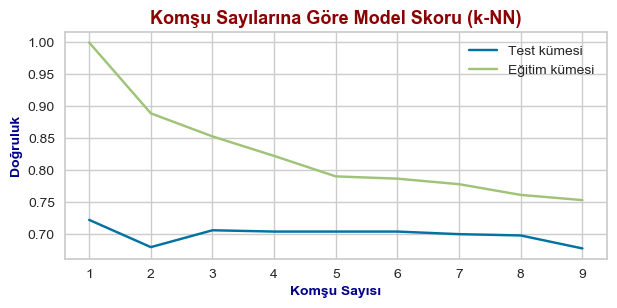

In [131]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.figure(figsize=(7,3), dpi = 100)
plt.plot(komsu_sayisi, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(komsu_sayisi, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)', fontdict= baslik_font)
plt.xlabel('Komşu Sayısı', fontdict= eksen_font)
plt.ylabel('Doğruluk', fontdict= eksen_font)
plt.show()

In [132]:
def employee_attrition_prediction2(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not attrition","Attrition"],
                        y = ["Not attrition","Attrition"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    return py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

    

In [133]:
#k=5 için
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
employee_attrition_prediction2(knn,smote_train_X,smote_test_X,
                             smote_train_Y,smote_test_Y,threshold_plot = True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.64      0.68       245
           1       0.68      0.77      0.72       249

    accuracy                           0.70       494
   macro avg       0.71      0.70      0.70       494
weighted avg       0.71      0.70      0.70       494

Accuracy Score   :  0.7044534412955465
Area under curve :  0.7039422998114909


In [134]:
#k=3 için
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
employee_attrition_prediction2(knn,smote_train_X,smote_test_X,
                             smote_train_Y,smote_test_Y,threshold_plot = True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.64      0.69       245
           1       0.69      0.77      0.72       249

    accuracy                           0.71       494
   macro avg       0.71      0.71      0.71       494
weighted avg       0.71      0.71      0.71       494

Accuracy Score   :  0.7064777327935222
Area under curve :  0.7059831161380214


## karar agacı

In [135]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
import graphviz

In [136]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [137]:
from IPython.display import Image

In [138]:
karar_agaci = DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)

karar_agaci.fit(os_smote_X, os_smote_Y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1337, splitter='best')

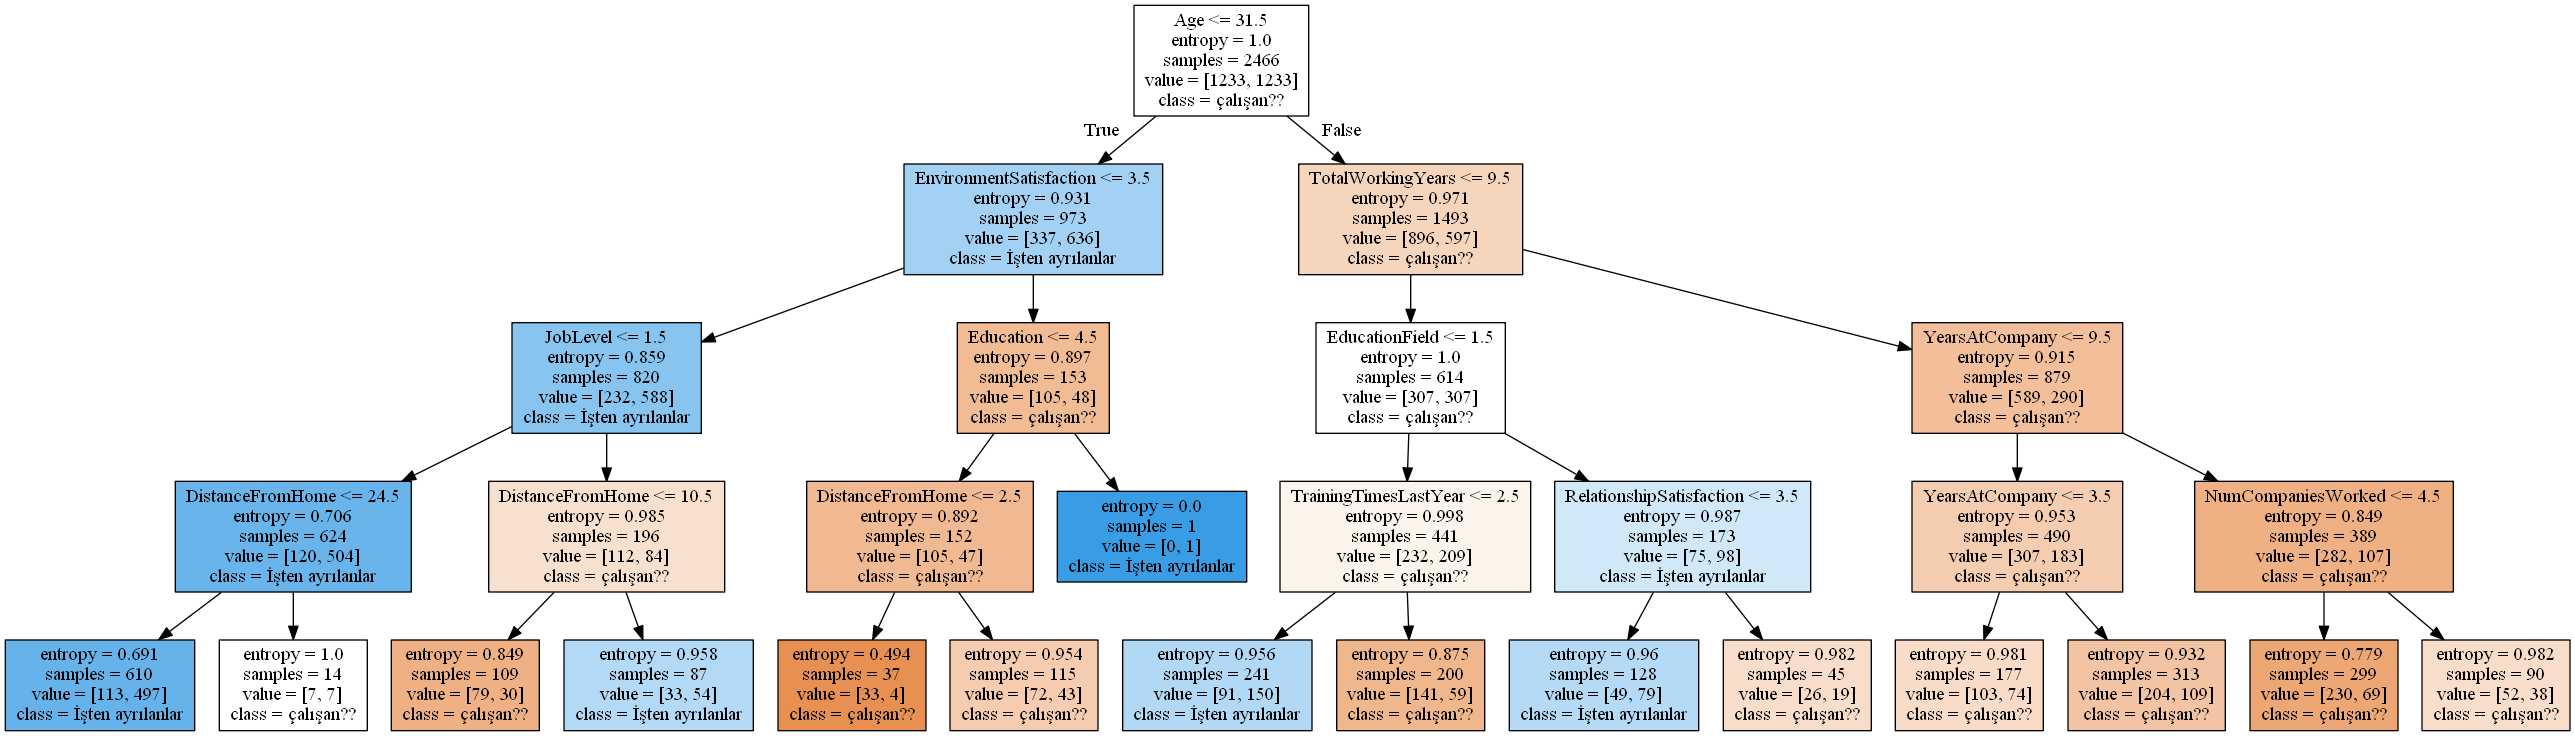

In [139]:
agac_data = export_graphviz(
    karar_agaci, out_file=None,
    feature_names=X.columns,
    class_names=['çalışan??', 'İşten ayrılanlar'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(agac_data)
Image(graph.create_png())

### Karar Ağaçları ile Regresyon

In [140]:
# Parametre belirleme

In [141]:
max_depth = np.arange(1, 33)
max_feature=np.arange(1,10)
min_samples_split=np.arange(2,6)
min_samples_leaf=np.arange(1,6)

egitim_kumesi_skoru = np.empty(5760)
test_kumesi_skoru = np.empty(5760)
x_index=list()
# x_index diye tanımladıgım yukarıdakı dort degıskenın yan yana yazılarak olusturdugu sayı,

In [142]:
y=0
for k in max_depth:
    for j in max_feature:
        for l in min_samples_leaf:
            for m in min_samples_split:
                dt_classifier = DecisionTreeClassifier(max_depth = k,
                                                       min_samples_split= m,
                                                       min_samples_leaf=l,
                                                       max_features=j,
                                                       splitter  = "best",
                                                       criterion = "gini",
                                                      )
                dt_classifier.fit(smote_train_X, smote_train_Y)
                
                
                egitim_kumesi_skoru[y] = dt_classifier.score(smote_train_X, smote_train_Y)
                x_index.append(k*1000+100*j+10*l+m)
                #Compute accuracy on the testing set
                test_kumesi_skoru[y] = dt_classifier.score(smote_test_X, smote_test_Y)
                y=y+1

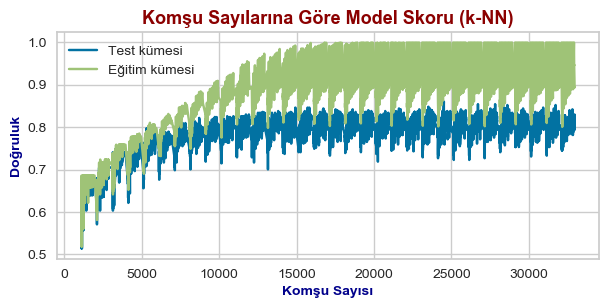

In [143]:

plt.figure(figsize=(7,3), dpi = 100)
plt.plot(x_index, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(x_index, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)', fontdict= baslik_font)
plt.xlabel('Komşu Sayısı', fontdict= eksen_font)
plt.ylabel('Doğruluk', fontdict= eksen_font)
plt.show()

In [144]:
# burdan anladıgım 17000 gıbı egıtımın skore unun sabıtlenıp yaklasık 1 e gıtmesı o zaman aralık olarak max_depth i 15,17 arasında secmek, grafıge bakarken daha mantıklı olacaktır

In [145]:
max_depth = np.arange(16, 18)
max_feature=np.arange(1,10)
min_samples_split=np.arange(2,6)
min_samples_leaf=np.arange(1,6)

egitim_kumesi_skoru = np.empty(360)
test_kumesi_skoru = np.empty(360)
x_index=list()
# x_index diye tanımladıgım yukarıdakı dort degıskenın yan yana yazılarak olusturdugu sayı,


In [146]:
y=0
for k in max_depth:
    for j in max_feature:
        for l in min_samples_leaf:
            for m in min_samples_split:
                dt_classifier = DecisionTreeClassifier(max_depth = k,
                                                       min_samples_split= m,
                                                       min_samples_leaf=l,
                                                       max_features=j,
                                                       splitter  = "best",
                                                       criterion = "gini",
                                                      )
                dt_classifier.fit(smote_train_X, smote_train_Y)
                
                
                egitim_kumesi_skoru[y] = dt_classifier.score(smote_train_X, smote_train_Y)
                x_index.append(k*1000+100*j+10*l+m)
                #Compute accuracy on the testing set
                test_kumesi_skoru[y] = dt_classifier.score(smote_test_X, smote_test_Y)
                y=y+1


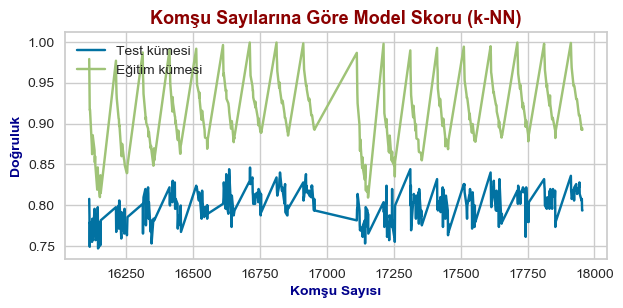

In [147]:

plt.figure(figsize=(7,3), dpi = 100)
plt.plot(x_index, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(x_index, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)', fontdict= baslik_font)
plt.xlabel('Komşu Sayısı', fontdict= eksen_font)
plt.ylabel('Doğruluk', fontdict= eksen_font)
plt.show()

In [148]:
# aralıgı yıne daraltmak için 16500 16750 aralıgı ıcın max_feature 5-7 aralıgı ve max_depth 16 olacak sekılde grafıge zoom yaparak bakmaya devam edelim

In [149]:
max_depth = np.arange(16, 17)
max_feature=np.arange(5,8)
min_samples_split=np.arange(2,6)
min_samples_leaf=np.arange(1,6)

egitim_kumesi_skoru = np.empty(60)
test_kumesi_skoru = np.empty(60)
x_index=list()
# x_index diye tanımladıgım yukarıdakı dort degıskenın yan yana yazılarak olusturdugu sayı,


In [150]:
y=0
for k in max_depth:
    for j in max_feature:
        for l in min_samples_leaf:
            for m in min_samples_split:
                dt_classifier = DecisionTreeClassifier(max_depth = k,
                                                       min_samples_split= m,
                                                       min_samples_leaf=l,
                                                       max_features=j,
                                                       splitter  = "best",
                                                       criterion = "gini",
                                                      )
                dt_classifier.fit(smote_train_X, smote_train_Y)
                
                
                egitim_kumesi_skoru[y] = dt_classifier.score(smote_train_X, smote_train_Y)
                x_index.append(k*1000+100*j+10*l+m)
                #Compute accuracy on the testing set
                test_kumesi_skoru[y] = dt_classifier.score(smote_test_X, smote_test_Y)
                y=y+1


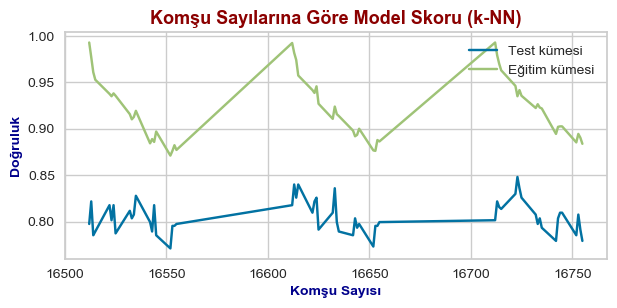

In [151]:

plt.figure(figsize=(7,3), dpi = 100)
plt.plot(x_index, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(x_index, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)', fontdict= baslik_font)
plt.xlabel('Komşu Sayısı', fontdict= eksen_font)
plt.ylabel('Doğruluk', fontdict= eksen_font)
plt.show()

In [152]:
# aralıgı yıne daraltmak için 16700 16750 aralıgı ıcın max_feature 7 ve max_depth 16 olacak sekılde grafıge zoom yaparak bakmaya devam edelim

In [153]:
max_depth = np.arange(16, 17)
max_feature=np.arange(7,8)
min_samples_split=np.arange(2,6)
min_samples_leaf=np.arange(1,6)

egitim_kumesi_skoru = np.empty(20)
test_kumesi_skoru = np.empty(20)
x_index=list()
# x_index diye tanımladıgım yukarıdakı dort degıskenın yan yana yazılarak olusturdugu sayı,

In [154]:
y=0
for k in max_depth:
    for j in max_feature:
        for l in min_samples_leaf:
            for m in min_samples_split:
                dt_classifier = DecisionTreeClassifier(max_depth = k,
                                                       min_samples_split= m,
                                                       min_samples_leaf=l,
                                                       max_features=j,
                                                       splitter  = "best",
                                                       criterion = "gini",
                                                      )
                dt_classifier.fit(smote_train_X, smote_train_Y)
                
                
                egitim_kumesi_skoru[y] = dt_classifier.score(smote_train_X, smote_train_Y)
                x_index.append(k*1000+100*j+10*l+m)
                #Compute accuracy on the testing set
                test_kumesi_skoru[y] = dt_classifier.score(smote_test_X, smote_test_Y)
                y=y+1


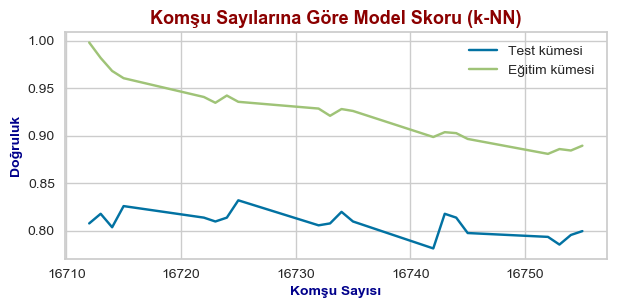

In [155]:

plt.figure(figsize=(7,3), dpi = 100)
plt.plot(x_index, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(x_index, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)', fontdict= baslik_font)
plt.xlabel('Komşu Sayısı', fontdict= eksen_font)
plt.ylabel('Doğruluk', fontdict= eksen_font)
plt.show()

In [156]:
# aralıgı yıne daraltmak için 16700 16750 aralıgı ıcın min_samples_leaf 1 veya 2 , max_feature 7 ve max_depth 16 olacak sekılde grafıge zoom yaparak bakmaya devam edelim

In [157]:
max_depth = np.arange(16, 17)
max_feature=np.arange(7,8)
min_samples_split=np.arange(2,6)
min_samples_leaf=np.arange(1,3)

egitim_kumesi_skoru = np.empty(8)
test_kumesi_skoru = np.empty(8)
x_index=list()
# x_index diye tanımladıgım yukarıdakı dort degıskenın yan yana yazılarak olusturdugu sayı,

In [158]:
y=0
for k in max_depth:
    for j in max_feature:
        for l in min_samples_leaf:
            for m in min_samples_split:
                dt_classifier = DecisionTreeClassifier(max_depth = k,
                                                       min_samples_split= m,
                                                       min_samples_leaf=l,
                                                       max_features=j,
                                                       splitter  = "best",
                                                       criterion = "gini",
                                                      )
                dt_classifier.fit(smote_train_X, smote_train_Y)
                
                
                egitim_kumesi_skoru[y] = dt_classifier.score(smote_train_X, smote_train_Y)
                x_index.append(k*1000+100*j+10*l+m)
                #Compute accuracy on the testing set
                test_kumesi_skoru[y] = dt_classifier.score(smote_test_X, smote_test_Y)
                y=y+1


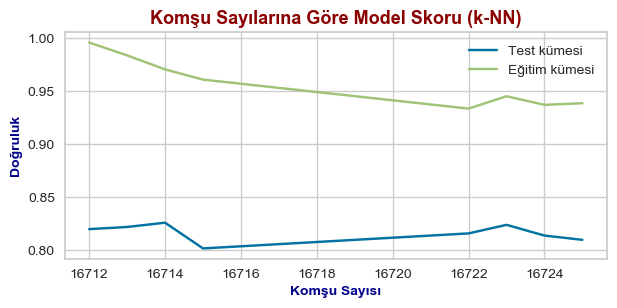

In [159]:

plt.figure(figsize=(7,3), dpi = 100)
plt.plot(x_index, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(x_index, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)', fontdict= baslik_font)
plt.xlabel('Komşu Sayısı', fontdict= eksen_font)
plt.ylabel('Doğruluk', fontdict= eksen_font)
plt.show()

In [160]:
# Best degerler
# max_depth = 16
# max_feature=7
# min_samples_split=2
# min_samples_leaf=1

In [161]:
dt_classifier = DecisionTreeClassifier(max_depth = 16,
                                        max_features=7,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        splitter  = "best",
                                        criterion = "gini",
                                        )
dt_classifier.fit(smote_train_X,smote_train_Y)

employee_attrition_prediction(dt_classifier,
                              smote_train_X,smote_test_X,smote_train_Y,smote_test_Y,
                              cols,"features",threshold_plot = True)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       245
           1       0.79      0.86      0.82       249

    accuracy                           0.81       494
   macro avg       0.82      0.81      0.81       494
weighted avg       0.82      0.81      0.81       494

Accuracy   Score :  0.8137651821862348
Area under curve :  0.8133923448897632 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## Rasgele Orman

### Rasgele Orman ile Sınıflandırma

In [162]:
from sklearn.ensemble import RandomForestClassifier
rastgele_orman = RandomForestClassifier(n_estimators=25, random_state=2)
rastgele_orman.fit(smote_train_X, smote_train_Y) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [163]:
from sklearn.metrics import accuracy_score
y_tahmin_ro = rastgele_orman.predict(smote_test_X)
print("Rastgele Orman Doğruluk Değeri : {:.2f}".format(accuracy_score(smote_test_Y, y_tahmin_ro)))

Rastgele Orman Doğruluk Değeri : 0.87


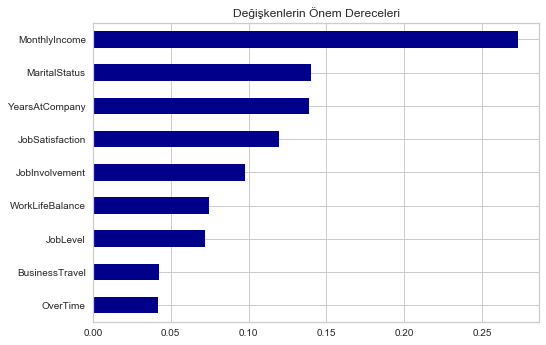

In [164]:
önem_dereceleri = pd.Series(data=rastgele_orman.feature_importances_,
                        index= smote_train_X.columns)

önem_dereceleri_sıralı = önem_dereceleri.sort_values()

önem_dereceleri_sıralı.plot(kind='barh', color='darkblue')
plt.title('Değişkenlerin Önem Dereceleri')
plt.show()

### SVM

In [165]:
from sklearn.svm import SVC

#Support vector classifier
#using linear hyper plane
svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

employee_attrition_prediction(svc_lin,smote_train_X,smote_test_X,smote_train_Y,smote_test_Y,
                         cols,"coefficients",threshold_plot = False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       245
           1       0.83      0.74      0.79       249

    accuracy                           0.80       494
   macro avg       0.80      0.80      0.80       494
weighted avg       0.80      0.80      0.80       494

Accuracy   Score :  0.7955465587044535
Area under curve :  0.7959757396934677 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## XGBoost ile Boosting

### XGBoost ile Sınıflandırma

In [166]:
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
attrition_dmatrix = xgb.DMatrix(data=smote_X, label=smote_Y)

In [167]:
params = {"objective":"reg:logistic", "max_depth":3, "silent":1}

In [168]:
attrition_cv = xgb.cv(dtrain=attrition_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="error", as_pandas=True, seed=123)
display(attrition_cv)

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.139796000000000,0.012933835625985,0.144218000000000,0.025289076258337
1,0.134694000000000,0.008456006977291,0.148299666666667,0.018354766162741
2,0.134013666666667,0.008830585497136,0.146258333333333,0.019527382643070
3,0.131292333333333,0.011674123873860,0.146258666666667,0.021099143431797
4,0.128231333333333,0.013287212507604,0.142176666666667,0.022684687938980


In [169]:
print('Doğruluk Değeri : {:.3f}'.format((1-attrition_cv["test-error-mean"]).max()))

Doğruluk Değeri : 0.858


In [170]:
attrition_auc = xgb.cv(dtrain=attrition_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="auc", as_pandas=True, seed=123)
display(attrition_auc)
print('AUC Skoru : {:.3f}'.format(attrition_auc["test-auc-mean"].max()))

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.745115666666667,0.007707943795563,0.703123333333333,0.051787074605757
1,0.795664333333333,0.020127462902435,0.742381333333333,0.031633592464692
2,0.808331000000000,0.014621412950419,0.752558333333333,0.033862094218889
3,0.816783666666667,0.011450213748611,0.758833666666667,0.032875941612202
4,0.832384333333333,0.009368811391467,0.763500000000000,0.032074843694085


AUC Skoru : 0.763


#### XGBoost parametre belırleme

### en iyi parametrelerin belirlenmesi


In [ ]:
#Gridsearch ile parametre bulma parametrelı buldugum sonuc buydu

In [192]:

from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=0.4, gamma=0.16, learning_rate=0.5, max_delta_step=0,
                    max_depth = 4, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0.18, reg_lambda=0.19, scale_pos_weight=1, seed=None,
                    silent=True, subsample=0.1)


employee_attrition_prediction(xgc,smote_train_X,smote_test_X,smote_train_Y,smote_test_Y,
                         cols,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.16,
              learning_rate=0.5, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.18, reg_lambda=0.19, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       245
           1       0.78      0.82      0.80       249

    accuracy                           0.79       494
   macro avg       0.79      0.79      0.79       494
weighted avg       0.79      0.79      0.79       494

Accuracy   Score :  0.7894736842105263
Area under curve :  0.7892631751495779 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [ ]:
# RandomizedSearchCV ile parametre belırleme

In [196]:
XGB_C = XGBClassifier()
parametreler = {"learning_rate": [x/10 for x in range (1, 10, 1)],
                "max_depth ": [x for x in range (4, 9, 1)],
                "subsample ":[x/10 for x in range (1, 5, 1)],
                "colsample_bytree":[x/10 for x in range (1, 5, 1)],
                "min_child_weight ":[x for x in range (1, 10, 1)],
                "gamma":[x/10 for x in range(1,10,1)],
                "reg_alpha":[x/10 for x in range(1,10,1)],
                "reg_lambda":[x/10 for x in range(1,11,1)],
                }

rs_cv = RandomizedSearchCV(estimator=XGB_C,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                          )
rs_cv.fit(smote_train_X, smote_train_Y)
print("En iyi parametreler : ", rs_cv.best_params_)
print("En iyi skor         : ", rs_cv.best_score_)

En iyi parametreler :  {'subsample ': 0.1, 'reg_lambda': 0.8, 'reg_alpha': 0.5, 'min_child_weight ': 5, 'max_depth ': 8, 'learning_rate': 0.4, 'gamma': 0.6, 'colsample_bytree': 0.4}
En iyi skor         :  0.8361526738522178


In [197]:
xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=0.4, gamma=0.6, learning_rate=0.4, max_delta_step=0,
                    max_depth = 8, min_child_weight=5, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0.5, reg_lambda=0.8, scale_pos_weight=1, seed=None,
                    silent=True, subsample=0.1)


employee_attrition_prediction(xgc,smote_train_X,smote_test_X,smote_train_Y,smote_test_Y,
                         cols,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.6,
              learning_rate=0.4, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.5, reg_lambda=0.8, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       245
           1       0.81      0.82      0.81       249

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494

Accuracy   Score :  0.8117408906882592
Area under curve :  0.811679370543398 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## Light GBM ile Boosting

In [182]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


employee_attrition_prediction(xgc,smote_train_X,smote_test_X,smote_train_Y,smote_test_Y,
                         cols,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       245
           1       0.88      0.89      0.89       249

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494

Accuracy   Score :  0.8846153846153846
Area under curve :  0.884558642734202 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### Light GBM ile Sınıflandırma

In [183]:
import lightgbm as lgb

In [184]:
d_train = lgb.Dataset(smote_train_X, label=smote_train_Y)

In [185]:
# parametre belirleme

In [186]:
params = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 10}

In [187]:
lgb_model = lgb.train(params, d_train, num_boost_round = 100)

In [188]:
y_tahmin=lgb_model.predict(smote_test_X)
y_tahmin[:10]

array([0.82090042, 0.80946333, 0.36758552, 0.09820767, 0.57400146,
       0.85807067, 0.95990127, 0.94447572, 0.91917377, 0.85455957])

In [189]:
y_tahmin = [0 if tahmin < 0.5 else 1 for tahmin in y_tahmin]
y_tahmin[:10]

[1, 1, 0, 0, 1, 1, 1, 1, 1, 1]

In [190]:
from sklearn.metrics import accuracy_score
dogruluk=accuracy_score(y_tahmin,smote_test_Y)
dogruluk

0.8481781376518218

In [191]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

employee_attrition_prediction(lgbm_c,smote_train_X,smote_test_X,smote_train_Y,smote_test_Y,
                         cols,"features",threshold_plot = True)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.84      0.88       245
           1       0.86      0.92      0.89       249

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494

Accuracy   Score :  0.8805668016194332
Area under curve :  0.8802803048930415 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## Model Performans karşılaştırma

In [ ]:
from sklearn.metrics import f1_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                      })
    return df

#outputs for every model
model1 = model_report(logit_GridSearchCV,train_X,test_X,train_Y,test_Y,
                      "Logistic Regr(Base)_Grid")
model2 = model_report(logit_RandomizedSearchCV,train_X,test_X,train_Y,test_Y,
                      "Logistic Regr(Base)_Rand")
model3 = model_report(logit_up_GridSearchCV,up_train_X,up_test_X,up_train_Y,up_test_Y,
                      "Logistic Regr(Up)_Grid")
model4 = model_report(logit_up_RandomizedSearchCV,up_train_X,up_test_X,up_train_Y,up_test_Y,
                      "Logistic Regr(Up)_Rand")
model5 = model_report(logit_up_rfe_GridSearchCV,up_rfe_train_X,up_rfe_test_X,up_rfe_train_Y,up_rfe_test_Y,
                      "Logistic Regr(Up_RFE)_Grid")
model6 = model_report(logit_up_rfe_RandomizedSearchCV,up_rfe_train_X,up_rfe_test_X,up_rfe_train_Y,up_rfe_test_Y,
                      "Logistic Regr(Up_RFE)_Rand")
model7 = model_report(logit_down_GridSearchCV,down_train_X,down_test_X,down_train_Y,down_test_Y,
                    "Logistic Regr(Down)_Grid")
model8 = model_report(logit_down_RandomizedSearchCV,down_train_X,down_test_X,down_train_Y,down_test_Y,
                      "Logistic Regr(Down)_Rand")
model9 = model_report(logit_down_rfe_GridSearchCV,down_rfe_train_X,down_rfe_test_X,down_rfe_train_Y,down_rfe_test_Y,
                      "Logistic Regr(Down_RFE)_Gr")
model10 = model_report(logit_down_rfe_RandomizedSearchCV,down_rfe_train_X,down_rfe_test_X,down_rfe_train_Y,down_rfe_test_Y,
                      "Logistic Regr(Down_RFE)_R")
model11 = model_report(logit_smote_GridSearchCV,smote_train_X,smote_test_X,smote_train_Y,smote_test_Y,
                      "Logistic Regr(SMOTE)_Grid")
model12 = model_report(logit_smote_RandomizedSearchCV,smote_train_X,smote_test_X,smote_train_Y,smote_test_Y,
                      "Logistic Regr(SMOTE)_Rand")
model13 = model_report(logit_smote_rfe_GridSearchCV,smote_rfe_train_X,smote_rfe_test_X,smote_rfe_train_Y,smote_rfe_test_Y,
                      "Logistic Regr(SMOTE_RFE)_G")
model14 = model_report(logit_smote_rfe_RandomizedSearchCV,smote_rfe_train_X,smote_rfe_test_X,smote_rfe_train_Y,smote_rfe_test_Y,
                      "Logistic Regr(SMOTE_RFE)_R")
model15 = model_report(logit_adasyn_GridSearchCV,adasyn_train_X,adasyn_test_X,adasyn_train_Y,adasyn_test_Y,
                      "Logistic Regr(ADASYN)_Grid")
model16 = model_report(logit_adasyn_RandomizedSearchCV,adasyn_train_X,adasyn_test_X,adasyn_train_Y,adasyn_test_Y,
                      "Logistic Regr(ADASYN)_Rand")
model17= model_report(logit_adasyn_rfe_GridSearchCV,adasyn_rfe_train_X,adasyn_rfe_test_X,adasyn_rfe_train_Y,adasyn_rfe_test_Y,
                      "Logistic Regr(ADASYN_RFE)_G")
model18 = model_report(logit_adasyn_rfe_RandomizedSearchCV,adasyn_rfe_train_X,adasyn_rfe_test_X,adasyn_rfe_train_Y,adasyn_rfe_test_Y,
                      "Logistic Regr(ADASYN_RFE)_R")

#concat all models
model_performances = pd.concat([model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,model14,model15,model16,model17,model18],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

In [ ]:
def employee_attrition_prediction_feature(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    return py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

In [ ]:
employee_attrition_prediction_feature(logit_smote_rfe_RandomizedSearchCV,adasyn_rfe_train_X,adasyn_rfe_test_X,adasyn_rfe_train_Y,adasyn_rfe_test_Y,
                         colss,threshold_plot = True)